In [1]:
import torch
from datasets.dataset import RandomPatchFromFolder
from utils.visualization import visualize_one, visualize_pairs, visualize_triplets
from models.baseline import ConvBlock, UpConvBlock, Baseline


from utils.metrics import psnr
from utils import utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from datasets.div2k import download_div2k
# download_div2k("data/div2k/")

In [4]:
train_dataset = RandomPatchFromFolder("data/div2k/original/train/")

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    pin_memory=True,
    batch_size=16,
    num_workers=4)

In [5]:
# plt.imshow(train_dataset[0][0])
x, y = train_dataset[0]

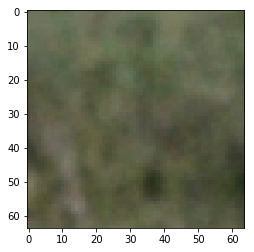

In [6]:
plt.imshow(RandomPatchFromFolder.to_image(x))

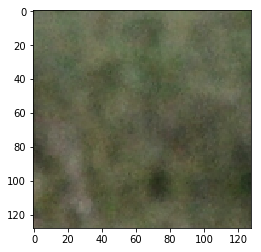

In [7]:
plt.imshow(RandomPatchFromFolder.to_image(y))

In [8]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

cuda:0


In [14]:
model = Baseline(ConvBlock(3, 32, 5),
                 ConvBlock(32, 32, 5),
                 ConvBlock(32, 64, 5),
                 ConvBlock(64, 64, 5),
                 ConvBlock(64, 128, 5),
                 ConvBlock(128, 128, 5),
                 UpConvBlock(128, 3, upscale=2),
                 ).to(device)


In [16]:
criterion = torch.nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True)

In [17]:
# torch.save(model.state_dict(), "baseline_state_dict.wght")

In [ ]:
errs, metrics = list(), list()
for epoch in range(10000):
    print("Epoch {} started".format(epoch))
    model.train()
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        
        batch_features = data.to(device)
        batch_labels = target.to(device)
        
        batch_preds = model.forward(batch_features)

        loss = criterion(batch_preds, batch_labels)
        loss.backward()
        optimizer.step()
        
        if i % 25 == 0:
            torch.save(model.state_dict(), "baseline_state_dict.wght")
            err = loss.item()
            errs.append(err)
            
            metric = psnr(err)
            metrics.append(metric)
            print("Batch {} loss {}, ".format(i, err), end="")
            print("PSNR: {}".format(metric))

Epoch 0 started
Batch 0 loss 1.571388840675354, PSNR: -1.962836646480484
Batch 25 loss 0.10770446062088013, PSNR: 9.677663098596957
Epoch 1 started
Batch 0 loss 0.03261873498558998, PSNR: 14.865328857062522
Batch 25 loss 0.01981031335890293, PSNR: 17.031086547508995
Epoch 2 started
Batch 0 loss 0.014856421388685703, PSNR: 18.28085790731287
Batch 25 loss 0.012169760651886463, PSNR: 19.147179631493223
Epoch 3 started
Batch 0 loss 0.00948410201817751, PSNR: 20.230037830686648
Batch 25 loss 0.0083914278075099, PSNR: 20.761641373637328
Epoch 4 started
Batch 0 loss 0.012281075119972229, PSNR: 19.10763612166102
Batch 25 loss 0.008943022228777409, PSNR: 20.48515689763935
Epoch 5 started
Batch 0 loss 0.011068024672567844, PSNR: 19.5592988141145
Batch 25 loss 0.005038404371589422, PSNR: 22.977069798902203
Epoch 6 started
Batch 0 loss 0.009328131563961506, PSNR: 20.30205337252775
Batch 25 loss 0.006751575041562319, PSNR: 21.705949009369935
Epoch 7 started
Batch 0 loss 0.004975386429578066, PSNR: 

Batch 25 loss 0.002694401890039444, PSNR: 25.69537625536214
Epoch 60 started
Batch 0 loss 0.0021769043523818254, PSNR: 26.621606523302106
Batch 25 loss 0.0014867206336930394, PSNR: 28.27770631104133
Epoch 61 started
Batch 0 loss 0.0019301087595522404, PSNR: 27.144182182758612
Batch 25 loss 0.0015646816464141011, PSNR: 28.05574011644662
Epoch 62 started
Batch 0 loss 0.0020910121966153383, PSNR: 26.796434339889792
Batch 25 loss 0.0033053287770599127, PSNR: 24.8078533528234
Epoch 63 started
Batch 0 loss 0.002049966948106885, PSNR: 26.88253141076203
Batch 25 loss 0.002832542872056365, PSNR: 25.47823508134785
Epoch 64 started
Batch 0 loss 0.00250544142909348, PSNR: 26.01115745513333
Batch 25 loss 0.002907664282247424, PSNR: 25.364557383852564
Epoch 65 started
Batch 0 loss 0.002023338107392192, PSNR: 26.939315389269552
Batch 25 loss 0.0023503273259848356, PSNR: 26.288716500816086
Epoch 66 started
Batch 0 loss 0.002044393215328455, PSNR: 26.89435568995563
Batch 25 loss 0.002851383527740836, P

Epoch 119 started
Batch 0 loss 0.0017445371486246586, PSNR: 27.58319778138528
Batch 25 loss 0.002246368210762739, PSNR: 26.485190553782854
Epoch 120 started
Batch 0 loss 0.00207951245829463, PSNR: 26.82038473446484
Batch 25 loss 0.0017494135536253452, PSNR: 27.571075130902294
Epoch 121 started
Batch 0 loss 0.001929676509462297, PSNR: 27.145154899200413
Batch 25 loss 0.0016421033069491386, PSNR: 27.84599524301447
Epoch 122 started
Batch 0 loss 0.0013466220116242766, PSNR: 28.707542909160225
Batch 25 loss 0.0013786554336547852, PSNR: 28.60544263164929
Epoch 123 started
Batch 0 loss 0.0024167171213775873, PSNR: 26.16774181125026
Batch 25 loss 0.0009865760803222656, PSNR: 30.0586941827787
Epoch 124 started
Batch 0 loss 0.0009848399786278605, PSNR: 30.06634329953809
Batch 25 loss 0.0038708264473825693, PSNR: 24.121963002991684
Epoch 125 started
Batch 0 loss 0.0017215510597452521, PSNR: 27.640800919620595
Batch 25 loss 0.0008663449552841485, PSNR: 30.62309149152563
Epoch 126 started
Batch 0 

Epoch 178 started
Batch 0 loss 0.0021776764187961817, PSNR: 26.62006651656184
Batch 25 loss 0.0007855125586502254, PSNR: 31.04846867137193
Epoch 179 started
Batch 0 loss 0.0029449332505464554, PSNR: 25.309245444245438
Batch 25 loss 0.0014892307808622718, PSNR: 28.27037995942444
Epoch 180 started
Batch 0 loss 0.0007076377514749765, PSNR: 31.50189006146816
Batch 25 loss 0.0019544947426766157, PSNR: 27.089654934228857
Epoch 181 started
Batch 0 loss 0.002254069782793522, PSNR: 26.470326429425146
Batch 25 loss 0.0019733214285224676, PSNR: 27.0480216803522
Epoch 182 started
Batch 0 loss 0.0016994826728478074, PSNR: 27.69683258927315
Batch 25 loss 0.0021800361573696136, PSNR: 26.615363032688443
Epoch 183 started
Batch 0 loss 0.0012529966188594699, PSNR: 29.020501009233723
Batch 25 loss 0.0011490146862342954, PSNR: 29.396744203023562
Epoch 184 started
Batch 0 loss 0.0032835982274264097, PSNR: 24.836499874497285
Batch 25 loss 0.002070828340947628, PSNR: 26.83855899981015
Epoch 185 started
Batch

Epoch 237 started
Batch 0 loss 0.0013149242149665952, PSNR: 28.810992768094046
Batch 25 loss 0.0011276049772277474, PSNR: 29.478430158283032
Epoch 238 started
Batch 0 loss 0.0019332513911649585, PSNR: 27.137116686321075
Batch 25 loss 0.0018258109921589494, PSNR: 27.385441826127703
Epoch 239 started
Batch 0 loss 0.00139817560557276, PSNR: 28.544382794188262
Batch 25 loss 0.0013158669462427497, PSNR: 28.807880221460064
Epoch 240 started
Batch 0 loss 0.001715834136120975, PSNR: 27.65524696236104
Batch 25 loss 0.0013215745566412807, PSNR: 28.78908331113781
Epoch 241 started
Batch 0 loss 0.0013986910926178098, PSNR: 28.54278190858411
Batch 25 loss 0.0011548566399142146, PSNR: 29.374719243072718
Epoch 242 started
Batch 0 loss 0.0021168829407542944, PSNR: 26.743031569026773
Batch 25 loss 0.0008361064246855676, PSNR: 30.77738439412662
Epoch 243 started
Batch 0 loss 0.0013759513385593891, PSNR: 28.613969249441354
Batch 25 loss 0.0021477583795785904, PSNR: 26.680145778691365
Epoch 244 started
Ba

Epoch 296 started
Batch 0 loss 0.0011728944955393672, PSNR: 29.307410518791954
Batch 25 loss 0.002074655145406723, PSNR: 26.83054082515108
Epoch 297 started
Batch 0 loss 0.001253617461770773, PSNR: 29.018349671633693
Batch 25 loss 0.0006175072048790753, PSNR: 32.09357970827858
Epoch 298 started
Batch 0 loss 0.001669525634497404, PSNR: 27.77406908244651
Batch 25 loss 0.0018160579493269324, PSNR: 27.40870297515716
Epoch 299 started
Batch 0 loss 0.002015970181673765, PSNR: 26.9551589585266
Batch 25 loss 0.002125553088262677, PSNR: 26.725280435307294
Epoch 300 started
Batch 0 loss 0.0018602536292746663, PSNR: 27.30427839499763
Batch 25 loss 0.0019217110238969326, PSNR: 27.16311918521031
Epoch 301 started
Batch 0 loss 0.00042893749196082354, PSNR: 33.676059919048306
Batch 25 loss 0.0011428844882175326, PSNR: 29.419976616998973
Epoch 302 started
Batch 0 loss 0.0019616903737187386, PSNR: 27.073695390543882
Batch 25 loss 0.0009216414764523506, PSNR: 30.35437989010857
Epoch 303 started
Batch 0 

Epoch 355 started
Batch 0 loss 0.001023775083012879, PSNR: 29.8979544466436
Batch 25 loss 0.0022836821153759956, PSNR: 26.413643492642752
Epoch 356 started
Batch 0 loss 0.0005968378391116858, PSNR: 32.24143650688766
Batch 25 loss 0.0014797840267419815, PSNR: 28.298016649013853
Epoch 357 started
Batch 0 loss 0.0034627884160727262, PSNR: 24.605740439802382
Batch 25 loss 0.0014652981190010905, PSNR: 28.34074007893102
Epoch 358 started
Batch 0 loss 0.0014534713700413704, PSNR: 28.375935183865067
Batch 25 loss 0.001228959416039288, PSNR: 29.104624585954085
Epoch 359 started
Batch 0 loss 0.002015216974541545, PSNR: 26.956781873526
Batch 25 loss 0.0014369875425472856, PSNR: 28.425469968110928
Epoch 360 started
Batch 0 loss 0.0015977848088368773, PSNR: 27.964817122734726
Batch 25 loss 0.0007646803860552609, PSNR: 31.16520049260806
Epoch 361 started
Batch 0 loss 0.001287538674660027, PSNR: 28.902397168971188
Batch 25 loss 0.0016853116685524583, PSNR: 27.733197722906233
Epoch 362 started
Batch 0

Epoch 414 started
Batch 0 loss 0.0014243479818105698, PSNR: 28.463838954479005
Batch 25 loss 0.0011561015853658319, PSNR: 29.370040032637004
Epoch 415 started
Batch 0 loss 0.0013661659322679043, PSNR: 28.644965487571298
Batch 25 loss 0.0007577294018119574, PSNR: 31.204858607023297
Epoch 416 started
Batch 0 loss 0.0013436399167403579, PSNR: 28.717171026551963
Batch 25 loss 0.0019513430306687951, PSNR: 27.0966637835977
Epoch 417 started
Batch 0 loss 0.0016582583775743842, PSNR: 27.803477999544242
Batch 25 loss 0.0021639529149979353, PSNR: 26.647521931860993
Epoch 418 started
Batch 0 loss 0.0016131176380440593, PSNR: 27.923339601432914
Batch 25 loss 0.001959859859198332, PSNR: 27.077749819867893
Epoch 419 started
Batch 0 loss 0.0013574314070865512, PSNR: 28.672821066941417
Batch 25 loss 0.0016962060471996665, PSNR: 27.705213928066122
Epoch 420 started
Batch 0 loss 0.0014024035772308707, PSNR: 28.531269891207316
Batch 25 loss 0.0009871928486973047, PSNR: 30.05597999362847
Epoch 421 started

Batch 25 loss 0.0013023667270317674, PSNR: 28.852667077029437
Epoch 473 started
Batch 0 loss 0.0015264427056536078, PSNR: 28.163194921091485
Batch 25 loss 0.001908314530737698, PSNR: 27.19350042783942
Epoch 474 started
Batch 0 loss 0.00217287871055305, PSNR: 26.62964515192433
Batch 25 loss 0.0018678427441045642, PSNR: 27.286596903342378
Epoch 475 started
Batch 0 loss 0.0016982229426503181, PSNR: 27.700052961844737
Batch 25 loss 0.0016822695033624768, PSNR: 27.741044280105584
Epoch 476 started
Batch 0 loss 0.0016226776642724872, PSNR: 27.897677417454453
Batch 25 loss 0.001767646404914558, PSNR: 27.526046056989124
Epoch 477 started
Batch 0 loss 0.0022383963223546743, PSNR: 26.500630163897668
Batch 25 loss 0.002404215047135949, PSNR: 26.190266890788145
Epoch 478 started
Batch 0 loss 0.0010278508998453617, PSNR: 29.880698795729884
Batch 25 loss 0.0020109727047383785, PSNR: 26.965938241133287
Epoch 479 started
Batch 0 loss 0.001555788330733776, PSNR: 28.080494902817232
Batch 25 loss 0.00189

Batch 25 loss 0.0012114309938624501, PSNR: 29.167013193211865
Epoch 532 started
Batch 0 loss 0.0011164890602231026, PSNR: 29.52145527951268
Batch 25 loss 0.0006327335140667856, PSNR: 31.98779161607238
Epoch 533 started
Batch 0 loss 0.001668501296080649, PSNR: 27.77673451652008
Batch 25 loss 0.001227909349836409, PSNR: 29.10833693715205
Epoch 534 started
Batch 0 loss 0.00250057689845562, PSNR: 26.019597853628934
Batch 25 loss 0.0018510278314352036, PSNR: 27.325870512914697
Epoch 535 started
Batch 0 loss 0.0011755443410947919, PSNR: 29.297609848039503
Batch 25 loss 0.001736425212584436, PSNR: 27.603439169091256
Epoch 536 started
Batch 0 loss 0.000858467014040798, PSNR: 30.662763876262837
Batch 25 loss 0.001258234609849751, PSNR: 29.00238372989798
Epoch 537 started
Batch 0 loss 0.0023420045617967844, PSNR: 26.30412263336567
Batch 25 loss 0.0022395181003957987, PSNR: 26.498454231187132
Epoch 538 started
Batch 0 loss 0.002210973994806409, PSNR: 26.55416365507444
Batch 25 loss 0.000993852154

Batch 25 loss 0.001589300693012774, PSNR: 27.987939272345486
Epoch 591 started
Batch 0 loss 0.0008154814131557941, PSNR: 30.885859331594084
Batch 25 loss 0.0014710592804476619, PSNR: 28.32369825809138
Epoch 592 started
Batch 0 loss 0.0015663383528590202, PSNR: 28.051144179439028
Batch 25 loss 0.0011316107120364904, PSNR: 29.46302950083623
Epoch 593 started
Batch 0 loss 0.0010585333220660686, PSNR: 29.752954660700407
Batch 25 loss 0.0005947345052845776, PSNR: 32.256768638885355
Epoch 594 started
Batch 0 loss 0.002491240855306387, PSNR: 26.035842824699863
Batch 25 loss 0.0014310884289443493, PSNR: 28.443335297510394
Epoch 595 started
Batch 0 loss 0.0008707523811608553, PSNR: 30.601053292457166
Batch 25 loss 0.0009620562777854502, PSNR: 30.16799522123528
Epoch 596 started
Batch 0 loss 0.002434811322018504, PSNR: 26.135346874189764
Batch 25 loss 0.0012623275397345424, PSNR: 28.988279428392048
Epoch 597 started
Batch 0 loss 0.001285852980799973, PSNR: 28.90808684038017
Batch 25 loss 0.00147

Batch 25 loss 0.002148955361917615, PSNR: 26.67772605576125
Epoch 650 started
Batch 0 loss 0.0008286947850137949, PSNR: 30.816053941680753
Batch 25 loss 0.0007056417525745928, PSNR: 31.514157300640463
Epoch 651 started
Batch 0 loss 0.0018934780964627862, PSNR: 27.227397143827986
Batch 25 loss 0.0015579984756186604, PSNR: 28.074329715869
Epoch 652 started
Batch 0 loss 0.0009081736207008362, PSNR: 30.418311170028186
Batch 25 loss 0.0009548095404170454, PSNR: 30.200832501912803
Epoch 653 started
Batch 0 loss 0.0009647451806813478, PSNR: 30.155873822395662
Batch 25 loss 0.001224613981321454, PSNR: 29.12000786566058
Epoch 654 started
Batch 0 loss 0.0010070930002257228, PSNR: 29.969304225745823
Batch 25 loss 0.001268817693926394, PSNR: 28.966007736574486
Epoch 655 started
Batch 0 loss 0.001132537261582911, PSNR: 29.459475003671102
Batch 25 loss 0.001080347690731287, PSNR: 29.66436452045422
Epoch 656 started
Batch 0 loss 0.0007928369450382888, PSNR: 31.008161205656425
Batch 25 loss 0.00247141

Batch 25 loss 0.0009601619676686823, PSNR: 30.17655500573422
Epoch 709 started
Batch 0 loss 0.0013536656042560935, PSNR: 28.684886060810637
Batch 25 loss 0.0017329746624454856, PSNR: 27.612077869921148
Epoch 710 started
Batch 0 loss 0.000623139610979706, PSNR: 32.054146411651814
Batch 25 loss 0.001713319099508226, PSNR: 27.661617437189648
Epoch 711 started
Batch 0 loss 0.002877795835956931, PSNR: 25.409400201500965
Batch 25 loss 0.0014863633550703526, PSNR: 28.278750103518565
Epoch 712 started
Batch 0 loss 0.000923593994230032, PSNR: 30.3451889979258
Batch 25 loss 0.0015752733452245593, PSNR: 28.026440755109135
Epoch 713 started
Batch 0 loss 0.0009354472276754677, PSNR: 30.28980707763969
Batch 25 loss 0.0011129860067740083, PSNR: 29.535102958800582
Epoch 714 started
Batch 0 loss 0.002314638113602996, PSNR: 26.355168999163524
Batch 25 loss 0.0016574328765273094, PSNR: 27.805640508230866
Epoch 715 started
Batch 0 loss 0.0009880127618089318, PSNR: 30.05237445749008
Batch 25 loss 0.0008681

Batch 25 loss 0.0012060763547196984, PSNR: 29.186251968527962
Epoch 768 started
Batch 0 loss 0.0020067060831934214, PSNR: 26.975162327914354
Batch 25 loss 0.0010354064870625734, PSNR: 29.848891183896527
Epoch 769 started
Batch 0 loss 0.0014403463574126363, PSNR: 28.415330613589987
Batch 25 loss 0.0020206777844578028, PSNR: 26.945029331885245
Epoch 770 started
Batch 0 loss 0.0012647859985008836, PSNR: 28.979829507983826
Batch 25 loss 0.0025253298226743937, PSNR: 25.97681892470828
Epoch 771 started
Batch 0 loss 0.0009028954082168639, PSNR: 30.443625556279258
Batch 25 loss 0.0011213027173653245, PSNR: 29.502771253769183
Epoch 772 started
Batch 0 loss 0.0007195387152023613, PSNR: 31.429458336295227
Batch 25 loss 0.001156796352006495, PSNR: 29.36743089608627
Epoch 773 started
Batch 0 loss 0.0014197604032233357, PSNR: 28.47784940361752
Batch 25 loss 0.0015264101093634963, PSNR: 28.163287663125146
Epoch 774 started
Batch 0 loss 0.001023735268972814, PSNR: 29.89812334462146
Batch 25 loss 0.000

Batch 25 loss 0.0013647641753777862, PSNR: 28.649423861178942
Epoch 827 started
Batch 0 loss 0.000819360779132694, PSNR: 30.865248285375188
Batch 25 loss 0.0006906232447363436, PSNR: 31.607588084209148
Epoch 828 started
Batch 0 loss 0.0012923268368467689, PSNR: 28.886276368917336
Batch 25 loss 0.0011745089432224631, PSNR: 29.30143671966512
Epoch 829 started
Batch 0 loss 0.0006204842356964946, PSNR: 32.07269247907384
Batch 25 loss 0.0014359430642798543, PSNR: 28.428627797032526
Epoch 830 started
Batch 0 loss 0.0009098516893573105, PSNR: 30.410293942097503
Batch 25 loss 0.0007896907045505941, PSNR: 31.025429740372637
Epoch 831 started
Batch 0 loss 0.0009573039133101702, PSNR: 30.189501657546014
Batch 25 loss 0.0008834519539959729, PSNR: 30.538170643596068
Epoch 832 started
Batch 0 loss 0.0032803944777697325, PSNR: 24.84073927868394
Batch 25 loss 0.001105602248571813, PSNR: 29.564010867016624
Epoch 833 started
Batch 0 loss 0.001793431700207293, PSNR: 27.463151580389752
Batch 25 loss 0.000

In [9]:
# def upscale_one(path, model=model):
#     prediction_batch = utils.to_batch(utils.read_data(path))
#     prediction = model.predict(prediction_batch)
#     return utils.normalized_tensor_to_image(prediction).squeeze()

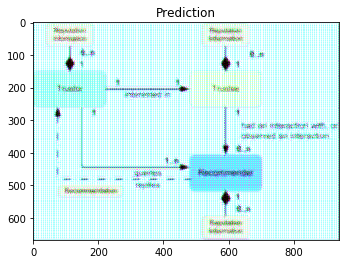

In [10]:
# prediction_batch = utils.to_batch(utils.read_data("/home/galecore/Downloads/image_2019-01-21_18-19-05.jpg"))
# prediction = model.predict(prediction_batch)

# visualize_one("Prediction", utils.normalized_tensor_to_image(prediction).squeeze())

In [11]:
# create (data, target) -> (data, prediction, target)
#map(lambda make_triplet, zip(pairs, predictions))

In [13]:
# torch.save(model.state_dict(), "state_dict.wght")